In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5967,5167-GBFRE,Male,1,No,No,4,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.20,102.5,Yes
5408,6407-GSJNL,Female,0,No,No,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.95,1288,No
6659,3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.30,6719.9,No
5387,8676-OOQEJ,Male,0,No,No,4,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,30.50,118.4,No
641,4580-TMHJU,Female,0,Yes,Yes,43,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,56.15,2499.3,Yes


In [3]:
df.drop('customerID', axis='columns', inplace = True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

In [9]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/home/zestypratyush/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure

In [16]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

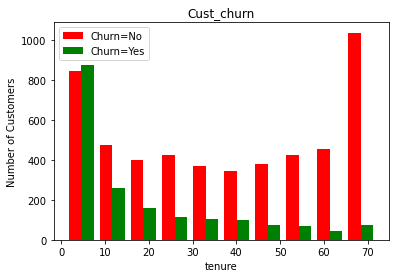

In [17]:
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Cust_churn")
plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label = ['Churn=No', 'Churn=Yes'])
plt.legend()

In [18]:
def print_unique_col_val(df1):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}:{df1[column].unique()}')

In [19]:
print_unique_col_val(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [20]:
df1.replace('No internet service','No',inplace= True)
df1.replace('No phone service','No',inplace= True)

/home/zestypratyush/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
print_unique_col_val(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [23]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

/home/zestypratyush/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace = True)

In [26]:
df1['gender'].unique()

array([1, 0])

In [27]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [28]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [30]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6034,1,0,0,0,0.084507,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
411,1,0,1,0,0.633803,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5069,1,0,0,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1825,1,0,0,0,0.436620,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3734,1,1,0,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0


In [33]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=98)

2022-06-01 01:04:24.536684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 01:04:24.536723: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/98


2022-06-01 01:04:26.707653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-01 01:04:26.707685: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-01 01:04:26.707705: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zestypratyush-HP-Laptop-14s-dk0xxx): /proc/driver/nvidia/version does not exist
2022-06-01 01:04:26.708100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


176/176 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7001
Epoch 2/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7820
Epoch 3/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7925
Epoch 4/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7963
Epoch 5/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.7996
Epoch 6/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8014
Epoch 7/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8050
Epoch 8/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8044
Epoch 9/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8046
Epoch 10/98
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8066
Epoch 11/9

176/176 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8215
Epoch 83/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8180
Epoch 84/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8196
Epoch 85/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8217
Epoch 86/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8208
Epoch 87/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8187
Epoch 88/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8217
Epoch 89/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8224
Epoch 90/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8197
Epoch 91/98
176/176 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8208
Ep

In [38]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7818


[0.44729846715927124, 0.7818052768707275]

In [39]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.21609841],
       [0.49473128],
       [0.01237764],
       [0.7151655 ],
       [0.5989281 ]], dtype=float32)

In [40]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)

In [41]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [42]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

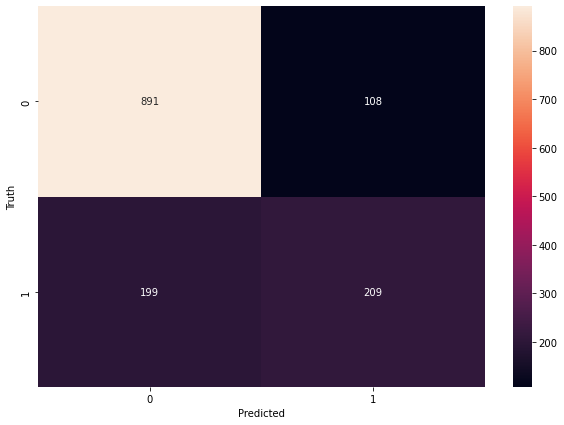

In [44]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Without Disturbing Dataset :

In [46]:
def ANN(X_train, y_train, X_test,y_test,loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_dim = 26,activation = 'relu'),
        keras.layers.Dense(15,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
    ])
    
    model.compile(optimizer ='adam', loss = loss, metrics = ['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs = 100)
    else :
        model.fit(X_train,y_train,epochs = 100,class_weight = weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n",classification_report(y_test,y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4950 - accuracy: 0.7648
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.7993
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8041
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8059
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8050
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8050
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8336
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8318
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8334
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8356
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8382
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8331
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8345
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8336
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8327
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 

In [48]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

Under Sampling : 

In [49]:
count_class_0,count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [50]:
count_class_0, count_class_1

(5163, 1869)

In [51]:
df_class_0.shape

(5163, 27)

In [52]:
df_class_1.shape

(1869, 27)

In [54]:
df_class_0_under = df_class_0.sample(count_class_1)

In [56]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis =0)
df_test_under.shape

(3738, 27)

In [58]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [59]:
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 15, stratify = y)

In [60]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [61]:
y_preds = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6249 - accuracy: 0.6686
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7569
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7666
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7746
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7779
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7773
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7826
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8284
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8294
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8274
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8291
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8271
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8251
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8304
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8291
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8324
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8341
Epoch 93/100


Over Sampling :

In [63]:
count_class_1,count_class_0

(1869, 5163)

In [64]:
df_class_1.shape

(1869, 27)

In [72]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

In [73]:
df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)

In [74]:
df_test_over.shape

(10326, 27)

In [75]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 15, stratify = y)

In [77]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [78]:
y_preds = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5656 - accuracy: 0.7142
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7574
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7619
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7667
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7725
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7745
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7758
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7786
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7798
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4530 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8309
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8304
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8318
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8329
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8324
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3651 - accuracy: 0.8328
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8339
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8343
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8320
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 

SMOTE

In [79]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [82]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = smote.fit_sample(X,y)

In [84]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X_sm,y_sm, test_size= 0.2, random_state = 15, stratify = y_sm)

In [86]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [87]:
y_preds = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.7610
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7787
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7808
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7869
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.7908
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7948
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7982
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8004
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8035
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4264 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8525
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8522
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8542
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8545
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8577
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3391 - accuracy: 0.8527
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8541
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8550
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8556
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 

Use Ensemble with undersampling

In [88]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [89]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 15, stratify = y)

In [91]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [92]:
4130/1495

2.762541806020067

In [93]:
4130/3

1376.6666666666667

In [96]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [97]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [99]:
def get_train_batch(df_majority, df_minority, start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train = df_train.drop('Churn',axis = 'columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [100]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,0,1495)

y_preds = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5858 - accuracy: 0.7204
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7645
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7742
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8130
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.8161
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4016 - accuracy: 0.8137
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8151
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8194
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8177
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8201
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8191
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8194
Epoch 93/100


In [101]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,1495,2990)

y_pred2 = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.6940
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5190 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7602
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7639
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.7642
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7669
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8130
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8161
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8087
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8127
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8097
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8114
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8094
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8177
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8137
Epoch 93/100


In [102]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,2990,4130)

y_pred3 = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6384 - accuracy: 0.6478
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7632
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7712
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7738
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7738
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7696
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7750
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7761
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7844
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7825
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8228
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8216
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8182
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.8228
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8273
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8243
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8239
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8231
Epoch 91/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8266
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8266
Epoch 93/100


In [103]:
y_pred_final = y_preds.copy()

for i in range(len(y_pred_final)):
    n_ones = y_preds[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else :
        y_pred_final[i] = 0
    

In [104]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.77      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407

